In [2]:
%cd /home/idies/workspace/Storage/ariel4/persistent/visualize-turbulence-data

/home/idies/workspace/Storage/ariel4/persistent/visualize-turbulence-data


In [3]:
pip uninstall -y giverny

Note: you may need to restart the kernel to use updated packages.


<hr style = "height:6px;border:none;background-color:sienna">

<h2 style = "font-weight:bold;font-style:italic">
    turbulence2 demo notebook
</h2>

<p style = "font-weight:bold;font-size:13px">
    &emsp;- stable release version 2023.04.21
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> :
    <br>
    &emsp;- SciServer processing of JHU turbulence datasets.
    <br>
    &emsp;- note: parallel dask workers need ~ 5 GB of memory for every complete database file (1.5 GB) they will read.
    <br><br>
    <u>supported datasets</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        isotropic4096 &ensp;: &ensp;isotropic 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic8192 &ensp;: &ensp;isotropic 8192-cube.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>functions</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        getPressure &ensp;: &ensp;retrieve and interpolate pressures for sparse points.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        getVelocity &ensp;: &ensp;retrieve and interpolate velocities for sparse points.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        getCutout &ensp;: &ensp;read data for a user-specified box.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        dataValues &ensp;: &ensp;see values for specific point(s) in the getCutout data.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        contourPlot &ensp;: &ensp;create a contour plot of getCutout data.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    instantiate dataset
</h4>

<p style = "font-weight:bold;font-size:13px">
    &emsp;n.b. &ensp;: &ensp;the metadata is stored in pickle files in the "pickled" folder. if processing fails, delete the 
    pickle files and try again.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- instantiate the dataset and cache the metadata.
    <br>

</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset_title &ensp;: &ensp;name of the turbulence dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_path &ensp;: &ensp;folder path in the "scratch" folder of the "Temporary" directory of the user's SciServer container.
        <br>
        &emsp;- default (if left blank) &ensp;: &ensp;/home/idies/workspace/Temporary/USERNAME/scratch/turbulence_output
        <br>
        &emsp;- output files will be saved in this folder.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset &ensp;: &ensp;instantiated dataset.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [4]:
import pandas as pd

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
"""
instantiate dataset
"""
from giverny.isotropic_cube import *

# user-defined parameters.
# -----
dataset_title = 'sabl2048low'

output_path = ''

# -----
# generates the morton cube representing the turbulence dataset.
dataset = iso_cube(dataset_title = dataset_title, output_path = output_path)

In [6]:
"""
process getCutout data
"""
from giverny.turbulence_toolkit import *
from giverny.turbulence_gizmos.basic_gizmos import *

# user-defined parameters.
# -----

# x_range = [1, 2048]
x_range = [1, 1]

y_range = [1, 2048]
# y_range = [1, 1]

z_range = [1, 2048]
# z_range = [1, 1]

def process_cutout_data(variable, timepoint):
    x_stride = 1
    y_stride = 1
    z_stride = 1

    # use the tools and processing gizmos.
    # -----
    # combine all of the axis data together for simplicity.
    axes_ranges = assemble_axis_data([x_range, y_range, z_range])
    strides = assemble_axis_data([x_stride, y_stride, z_stride])

    # process a brick cutout.
    return getCutout(dataset, variable, timepoint, axes_ranges, strides), axes_ranges, strides

In [7]:
cutout_data, axes_ranges, strides = process_cutout_data(variable='energy', timepoint=11)

Note: For larger boxes, e.g. 512-cubed and up, processing will take approximately 1 minute or more...
-----

Step 1: Determining which database files the user-specified box is found in...
-------------------------
number of database files that the user-specified box is found in:
16

number of hard disks that the database files are distributed on:
10

Successfully completed.
-----

Step 2: Reading the data from all of the database files and storing the values into a matrix...
-------------------------
Starting a local dask cluster...


2024-06-24 14:03:14,159 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-p4gv1t1m', purging
2024-06-24 14:03:14,161 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ze359psg', purging
2024-06-24 14:03:14,164 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-bh9lsebe', purging
2024-06-24 14:03:14,166 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-k0zbjzlh', purging


Database files are being read in parallel...

Successfully completed.
-----

step 1 time elapsed = 0.043 seconds (0.001 minutes)
step 2 time elapsed = 13.697 seconds (0.228 minutes)
total time elapsed = 13.756 seconds (0.229 minutes)

Data processing pipeline has completed successfully.
-----


In [8]:
from giverny.turbulence_gizmos.basic_gizmos import * 

"""
contour plot
"""
def contour_plot(x_range, y_range, z_range, output_filename=f'turbulence_plane-contour_plot-ncar'):
    # user-defined parameters.
    # -----
    x_plot_range = x_range
    # x_plot_range = [1, 2048]
    # x_plot_range = [1, 1]

    y_plot_range = y_range
    # y_plot_range = [1, 2048]
    # y_plot_range = [1, 1]

    z_plot_range = z_range
    # z_plot_range = [1, 2048]
    # z_plot_range = [1, 1]

    value_index = 1

    # use the tools and contour plot gizmo.
    # -----
    # combine all of the plot axis ranges together for simplicity.
    plot_ranges = assemble_axis_data([x_plot_range, y_plot_range, z_plot_range])

    # create the contour plot.
    contourPlot(dataset, value_index, cutout_data, plot_ranges, axes_ranges, strides, output_filename)

Generating contour plot...
-----


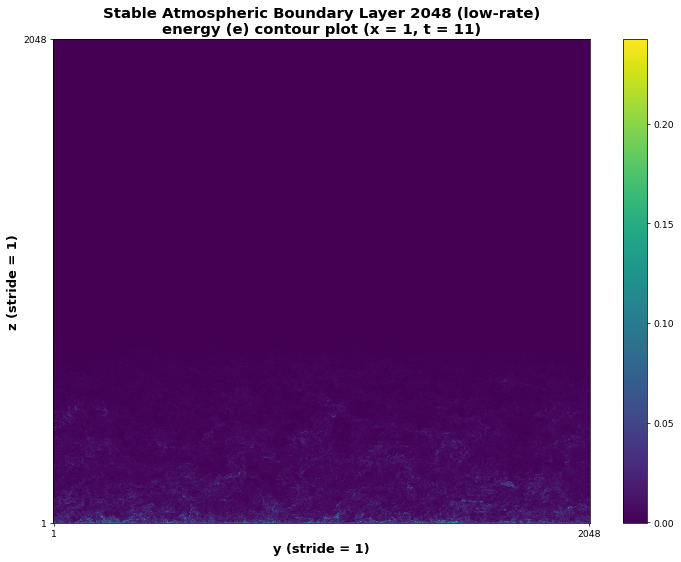

-----
Contour plot created successfully.


In [9]:
contour_plot(x_range, y_range, z_range)

### Make plots for all vars, timesteps

In [ ]:
dataset_title = 'sabl2048high'
timestep_range = range(21,106)
variables = ['energy', 'pressure', 'temperature', 'velocity']

dataset = iso_cube(dataset_title = dataset_title, output_path = '')

for t in timestep_range:
    print("Timestep: ", t)
    for var in variables:
        cutout_data, axes_ranges, strides = process_cutout_data(variable=var, timepoint=t)
        contour_plot(x_range, y_range, z_range, output_filename="images/" + dataset_title + "_" + str(t) + "_" + var)

### The below will stop at 20 timesteps, for both datasets..

In [ ]:
# dataset_titles = ['sabl2048low', 'sabl2048high']
# timestep_ranges = [range(1,21), range(1,106)]
# variables = ['energy', 'pressure', 'temperature', 'velocity']


# for dataset_title_i in range(len(dataset_titles)):
#     d_t = dataset_titles[dataset_title_i]
#     print("Dataset now printing: ", d_t)
#     dataset = iso_cube(dataset_title = d_t, output_path = '')
#     timestep_range = timestep_ranges[dataset_title_i]
#     for t in timestep_range:
#         print("Timestep: ", t)
#         for var in variables:
#             cutout_data, axes_ranges, strides = process_cutout_data(variable=var, timepoint=t)
#             contour_plot(x_range, y_range, z_range, output_filename="images/" + d_t+"_" + str(t) + "_" + var)